In [4]:
using BasisFunctions, Plots, MoreBasisFunctions

┌ Info: Precompiling MoreBasisFunctions [69773a9b-bf95-48cf-a035-4f9504b12466]
└ @ Base loading.jl:1273


In [5]:
#include("../src/MoreBasisFunctions.jl")
#include("../src/bases/poly/periodicbspline.jl")

In [13]:
nods = MoreBasisFunctions.get_pbspline_nodes(Float64, 10)

10-element Array{Float64,1}:
 0.0               
 0.1111111111111111
 0.2222222222222222
 0.3333333333333333
 0.4444444444444444
 0.5555555555555556
 0.6666666666666666
 0.7777777777777778
 0.8888888888888888
 1.0               

In [26]:
Spl = PBSpline(3, nods)

PBSpline
    ↳ length = 10
    ↳ Float64 -> Float64
    ↳ support = 0.0..1.0 (Unit)

In [27]:
Spl[1](0.1)

0.16666666666666666

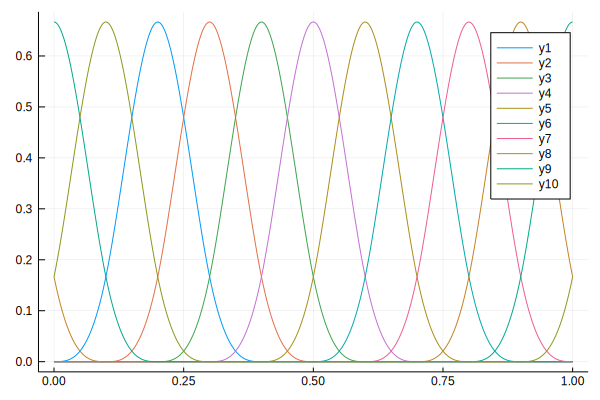

In [28]:
np = 1001
xp = collect(range(0.,stop=1.,length=np));
p = plot()
for i in 1:length(Spl)
    yp = Spl[i].(xp)
    plot!(p, xp, yp)
end
display(p)

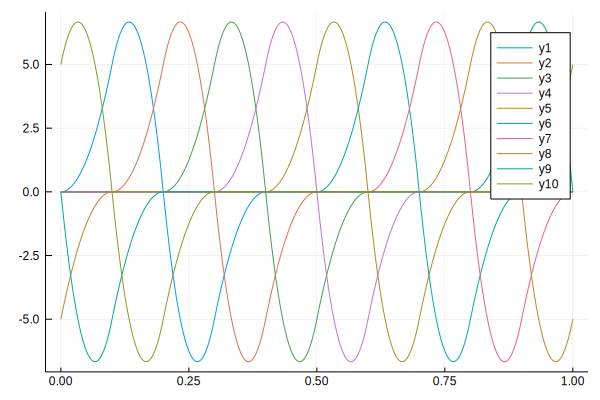

In [29]:
p = plot()
yp = zero(xp)
for i in 1:length(Spl)
    for j in 1:length(xp)
        yp[j] = eval_element_derivative(Spl, i, xp[j])
    end
    plot!(p, xp, yp)
end
display(p)

In [30]:
@time eval_element_derivative(Spl, 1, 0.1)

  0.000008 seconds (5 allocations: 176 bytes)


5.0

In [31]:
@time eval_element(Spl, 1, 0.4)

  0.000007 seconds (5 allocations: 176 bytes)


0.0

In [32]:
Spl2 = PBSpline(2, nods, -2., 2.)

Dictionary M(P)

P	:	PBSpline
		    ↳ length = 10
		    ↳ Float64 -> Float64
		    ↳ support = 0.0..1.0 (Unit)
M	:	Mapping from 0.0..1.0 (Unit) to -2.0..2.0


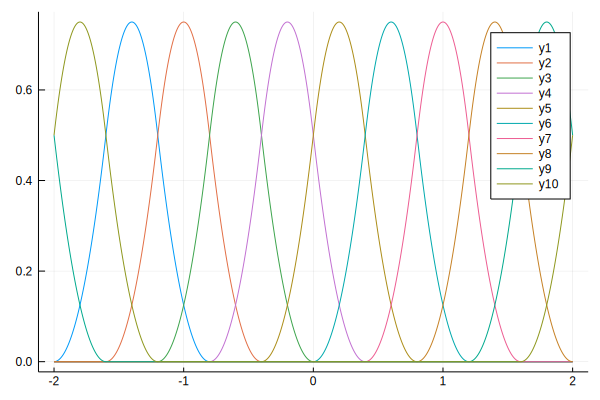

In [33]:
xp2 = collect(range(-2.,stop=2.,length=np));
p = plot()
for i in 1:length(Spl2)
    yp = Spl2[i].(xp2)
    plot!(p, xp2, yp)
end
display(p)

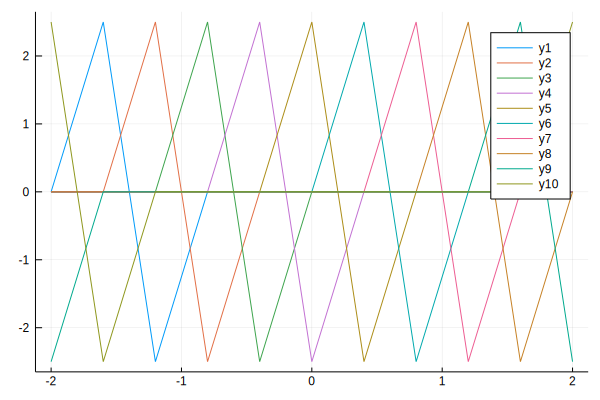

In [34]:
p = plot()
yp = zero(xp2)
for i in 1:length(Spl2)
    for j in 1:length(xp2)
        yp[j] = eval_element_derivative(Spl2, i, xp2[j])
    end
    plot!(p, xp2, yp)
end
display(p)